In [1]:
import numpy as np
import matplotlib.pyplot as plt

### Integrate-and-fire model
The integrate-and-fire model is one of the simplest model of neural firing. I will now lay down a few facts upon which this model is based.

Fact 1: Neurons are surrounded by an impermeable membrane.
Fact 2: The inside of a neuron is more negative than the outside.

Based on these two facts alone, one simplifies the neuron as a simple capcitance circuit. Equal positive and negative charge is present on either side of the impermeable membrane. THis is represented by the following equations

$Q_c = (V_{in} - V_{out}) C$

By convention, we always consider $V_{out} = 0$. We then simplify the notation by $V_{in} = V$ to get

$Q_c = V C$

$\frac{dQ_c}{dt} = C \frac{dV}{dt}$

$\frac{dV}{dt} = \frac{I}{C}$

In [2]:
class IFNeuron:
    def __init__(self, C, V0, Vth, Vr):
        # Set the parameters of the LIF neuron
        self.C = C                   # Capacitance of the neuron
        self.Vth = Vth               # Membrane potential threshold value
        self.Vr = Vr                 # Membrane potential reset value
        self.V = V0                  # Initial membrane potential
        self.t_last_spike = -np.inf  # Last spike time (initialised to a large negative value)
        self.n_spikes = 0            # Number of spikes (initialised to 0)
    
    def update(self, dt, I):
        # Update the membrane potential using the IF equation
        dV = I * dt / self.C  # Compute the change in membrane potential
        self.V += dV          # Update the membrane potential
        
        # Check if the neuron has spiked
        if self.V >= self.Vth:
            self.V = self.Vr       # Reset the membrane potential
            self.t_last_spike = 0  # Set the last spike time to 0
            self.n_spikes += 1     # Increment the number of spikes
        else:
            self.t_last_spike += dt  # Increment the last spike time

In [3]:
# Create an instance of the IFNeuron class
neuron = IFNeuron(C=1, V0=0, Vth=2, Vr=-1)

# Set the time step and the time range
dt = 0.1
t = np.arange(0, 100, dt)

# Initialize an empty list to store the membrane potentials
V = []

# Iterate over the time range
for i in range(len(t)):
    I = 0.1               # Constant current input
    neuron.update(dt, I)  # Update state of the neuron
    V.append(neuron.V)    # Append the membrane potential to the list

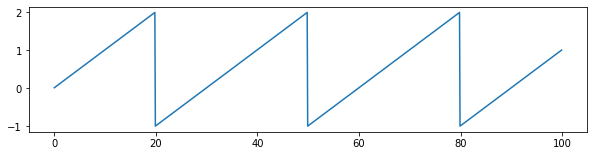

In [4]:
# Plot memebrane potential over time 
fig,ax = plt.subplots(1,1, figsize=(10,2.3))
ax.plot(t,V)
plt.show()

### Leaky integrate-and-fire model
The leaky integrate-and-fire model goes one step further. It assumes that there is some charge that leaks through the membrate; that it is not completely impermeable. In the circuit sense, this is modelled as a resistor. Together, the leaky integrate-and-fire model is modelled as an RC circuit with a battery of potential $V_{rest}$.

$\frac{dV}{dt} = \frac{-(V_{in} - V^*)}{\tau}$

where $V^*$ is the target membrane potential and $\tau$ is the time constant.

$V^* = V_{rest} + IR$

$\tau = RC$

In [5]:
class LIFNeuron:
    def __init__(self, C, R, V0, Vth, Vr, Vrest):
        # Set the parameters of the LIF neuron
        self.C = C                   # Capacitance of the neuron
        self.R = R                   # Resistance of the neuron
        self.Vth = Vth               # Membrane potential threshold value
        self.Vr = Vr                 # Membrane potential reset value
        self.Vrest = Vrest           # Resting membrane potential
        self.V = V0                  # Initial membrane potential
        self.t_last_spike = -np.inf  # Last spike time (initialised to a large negative value)
        self.n_spikes = 0            # Number of spikes (initialised to 0)
    
    def update(self, dt, I):
        # Update the membrane potential using the LIF equation
        Vtarget = self.Vrest + I*self.R  # Target membrane potential
        tau = self.R * self.C            # Time constant
        dV = -(self.V - Vtarget)*dt/tau  # Compute the change in membrane potential
        self.V += dV                     # Update the membrane potential
        
        # Check if the neuron has spiked
        if self.V >= self.Vth:
            self.V = self.Vr       # Reset the membrane potential
            self.t_last_spike = 0  # Set the last spike time to 0
            self.n_spikes += 1     # Increment the number of spikes
        else:
            self.t_last_spike += dt  # Increment the last spike time

In [32]:
# Create an instance of the LIFNeuron class
lif_neuron = LIFNeuron(C=1, R=10, V0=-75, Vth=20, Vr=-90, Vrest=-70)

# Set the time step and the time range
dt = 0.1
t = np.arange(0, 100, dt)

# Initialize an empty list to store the membrane potentials
V = []
d = np.zeros(t.shape)

# Iterate over the time range
for i in range(len(t)):
    I = 10                    # Constant current input
    lif_neuron.update(dt, I)  # Update state of the neuron
    V.append(lif_neuron.V)    # Append the membrane potential to the list

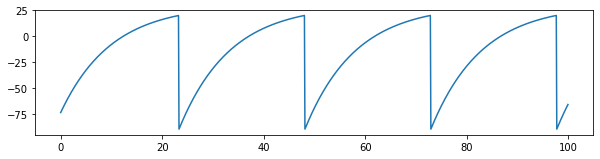

In [33]:
# Plot memebrane potential over time 
fig,ax = plt.subplots(1,1, figsize=(10,2.3))
ax.plot(t,V)
plt.show()

Note that neither the IF model, nor the LIF model exhibit neural spiking dynamics naturally. We force this with a hack by using threshold $V_{th}$ and reset $V_{reset}$ values for the membrane potential. But these models are still popular as they are computationally simple, and can be used to network several such neurons to explore network dynamics.
